In [101]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('/Users/johnngai/Desktop/final_project/ATP_matches_past_10_years_record/atp_matches_record_past_10_years.csv')

# Data in year 2017 has inconsistent values in column 'tourney_name' with the rest of the years
data.replace({'tourney_name':'Monte Carlo'}, value='Monte Carlo Masters', inplace=True)


In [102]:
two_data=data[((data['tourney_name']=='Monte Carlo Masters') | (data['tourney_name']=='Roland Garros')) & (data['round'].isin(['F','SF','QF','R16','R32','R64']))]

In [146]:
two_data['w_SvGms']

858       9.0
859       9.0
860      14.0
861       7.0
862      11.0
863      15.0
864      16.0
865       9.0
866      14.0
867      15.0
868      11.0
869      10.0
870      15.0
871      12.0
872       NaN
873       8.0
874       8.0
875      12.0
876      18.0
877      14.0
878       9.0
879      11.0
880      12.0
881      14.0
882       8.0
883       9.0
884      13.0
885      15.0
886      10.0
887      10.0
         ... 
68539    17.0
68540    15.0
68541     8.0
68542     7.0
68543    11.0
68544    12.0
68545    14.0
68546    13.0
68547    11.0
68548    10.0
68549     8.0
68550    11.0
68551     9.0
68552    10.0
68553     7.0
68554     8.0
68555     9.0
68556     NaN
68557    10.0
68558    14.0
68559     9.0
68560    13.0
68561     7.0
68562    11.0
68563    10.0
68564    14.0
68565    13.0
68566    10.0
68567    10.0
68568    15.0
Name: w_SvGms, Length: 3226, dtype: float64

In [134]:
two_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3226 entries, 858 to 68568
Data columns (total 49 columns):
tourney_id            3226 non-null object
tourney_name          3226 non-null object
surface               3226 non-null object
draw_size             3226 non-null float64
tourney_level         3226 non-null object
tourney_date          3226 non-null float64
match_num             3226 non-null float64
winner_id             3226 non-null float64
winner_seed           2254 non-null float64
winner_entry          210 non-null object
winner_name           3226 non-null object
winner_hand           3226 non-null object
winner_ht             3070 non-null float64
winner_ioc            3226 non-null object
winner_age            3226 non-null float64
winner_rank           3224 non-null float64
winner_rank_points    3224 non-null float64
loser_id              3226 non-null float64
loser_seed            1120 non-null float64
loser_entry           454 non-null object
loser_name           

In [135]:
two_data.replace({'round': {'F': 'W', 'SF': 'W', 'QF':'L', 'R16':'L', 'R32':'L', 'R64':'L'}},inplace=True)


In [136]:
two_data['round']

858      W
859      W
860      W
861      L
862      L
863      L
864      L
865      L
866      L
867      L
868      L
869      L
870      L
871      L
872      L
873      L
874      L
875      L
876      L
877      L
878      L
879      L
880      L
881      L
882      L
883      L
884      L
885      L
886      L
887      L
        ..
68539    L
68540    L
68541    L
68542    L
68543    L
68544    L
68545    L
68546    L
68547    L
68548    L
68549    L
68550    L
68551    L
68552    L
68553    L
68554    L
68555    L
68556    L
68557    L
68558    L
68559    L
68560    L
68561    L
68562    L
68563    L
68564    L
68565    L
68566    W
68567    W
68568    W
Name: round, Length: 3226, dtype: object

In [137]:
two_data['tourney_id']=two_data['tourney_id'].astype(str).apply(lambda x: x.split('-')[0])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [138]:
roland=two_data[(two_data['tourney_name']=='Roland Garros')&(two_data['tourney_id']=='2018')]['winner_name'].unique()

In [139]:
roland

array(['Rafael Nadal', 'Richard Gasquet', 'Maximilian Marterer',
       'Jurgen Zopp', 'Diego Sebastian Schwartzman', 'Borna Coric',
       'Mischa Zverev', 'Kevin Anderson', 'Marin Cilic', 'Steve Johnson',
       'Fabio Fognini', 'Kyle Edmund', 'John Isner',
       'Pierre Hugues Herbert', 'Albert Ramos', 'Juan Martin Del Potro',
       'David Goffin', 'Gael Monfils', 'Marco Cecchinato',
       'Pablo Carreno Busta', 'Roberto Bautista Agut', 'Novak Djokovic',
       'Fernando Verdasco', 'Grigor Dimitrov', 'Dominic Thiem',
       'Matteo Berrettini', 'Kei Nishikori', 'Gilles Simon',
       'Lucas Pouille', 'Karen Khachanov', 'Damir Dzumhur',
       'Alexander Zverev'], dtype=object)

In [140]:
monte=two_data[(two_data['tourney_name']=='Monte Carlo Masters')&(two_data['tourney_id']=='2018')]['winner_name'].unique()

In [141]:
monte

array(['Rafael Nadal', 'Kei Nishikori', 'Grigor Dimitrov',
       'Alexander Zverev', 'Dominic Thiem', 'David Goffin',
       'Richard Gasquet', 'Marin Cilic', 'Karen Khachanov',
       'Novak Djokovic', 'Philipp Kohlschreiber', 'Roberto Bautista Agut',
       'Mischa Zverev', 'Jan Lennard Struff', 'Andreas Seppi',
       'Milos Raonic', 'Aljaz Bedene', 'Gilles Simon', 'Borna Coric',
       'Andrey Rublev', 'Pierre Hugues Herbert', 'Albert Ramos',
       'Feliciano Lopez', 'Stefanos Tsitsipas',
       'Diego Sebastian Schwartzman', 'Fabio Fognini', 'Gilles Muller',
       'Daniil Medvedev', 'Marco Cecchinato', 'Fernando Verdasco'],
      dtype=object)

In [142]:
def intersection(lst1, lst2): 
    return [value for value in lst1 if value in lst2] 
    

In [143]:
common=intersection(monte,roland)

In [144]:
common_df=two_data[two_data['tourney_id']=='2018']

In [151]:
common_df['bp_percentage']=common_df.w_bpSaved/common_df.w_bpFaced

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [156]:
useful_columns=['winner_name','winner_ht','winner_age','winner_rank','winner_rank_points','w_ace', 'w_df','w_1stWon','w_2ndWon', 'w_SvGms', 'bp_percentage']

In [157]:
classifier=common_df[useful_columns].groupby('winner_name').mean()

In [158]:
corr=classifier.corr()

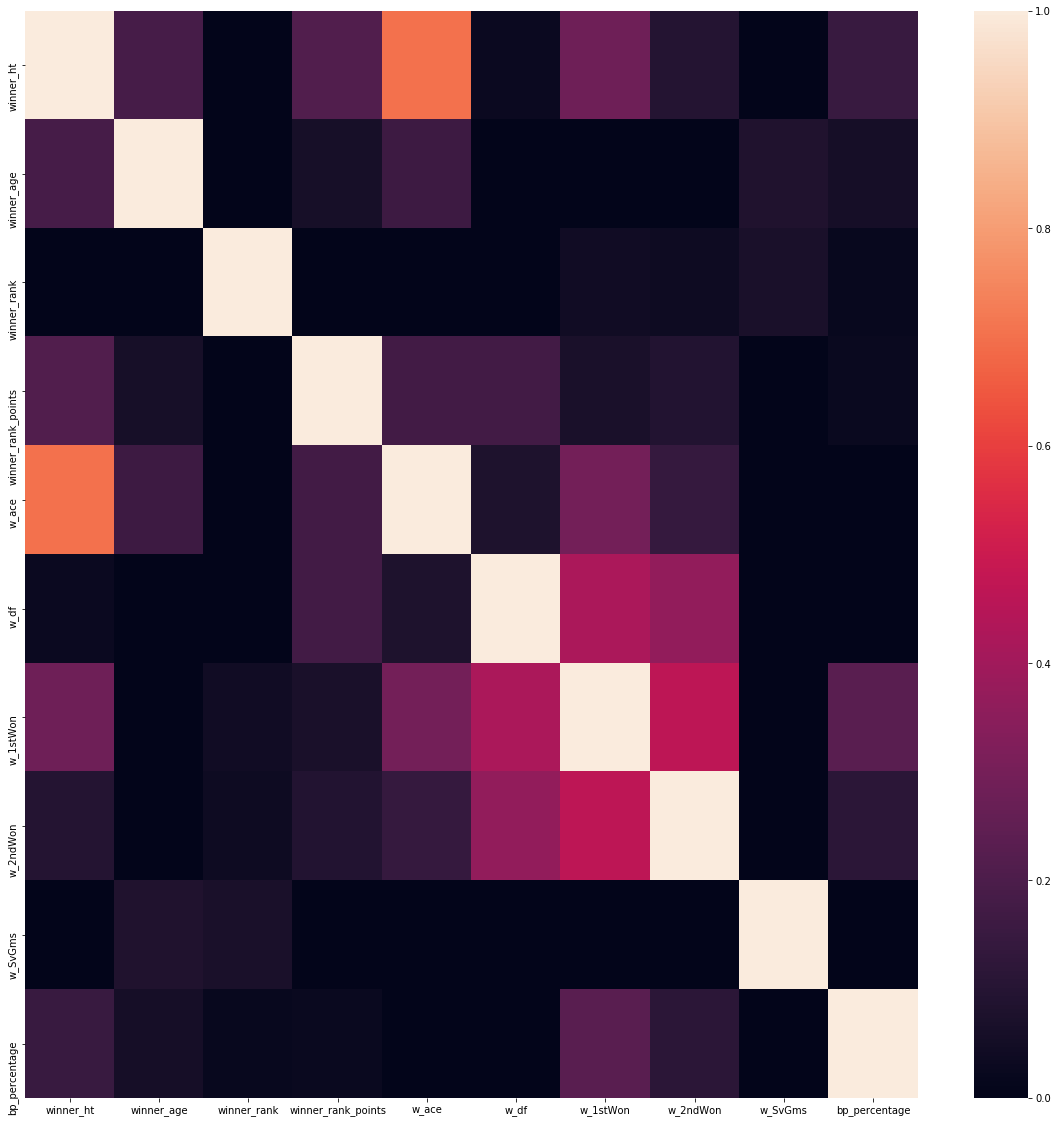

In [159]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,vmin=0)



In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split


xgb_model=xgb.XGBClassifier()

x_train, x_test, y_train, y_test=train_test_split()


